## 3. Models
First we will apply onehot encoder to our genre column, then we will select relevant numerical columns and apply a standardscaler on it. On that final dataframe we will train a few models (KMeans, DBScan and another one)

In [66]:
# PSEUDOCODE notes


#Zelda.. -> 4325345zelda..
#keyword = "zelda"
#lst = list(....)
#if keyworkd in lst

# usuario entra palabra clave.
# poner palabra clave en lowercase. -> Eliminar caracteres especiales
# buscar la palabra clave en la lista de titulos (en lowercase) list(df['name'].apply(lambda x: x.lower()))
# palabra_clave_usuario in lista_titulos. 
# si el juego no esta, puedes mostrar un mensaje "lo siento el juego no esta en la base de datos, escoge otro"
# si esta, obtener una lista de los juegos que tienen la palabra clave
# mostrar la lista al usuario y que escoja el juego. 
# sacar un juego al azar del mismo cluster.

In [67]:
import pandas as pd
import numpy as np


In [68]:
data = pd.read_csv('../data/clean/nintendo_switch_games_clean.csv')
#load and split between numericals and categoricals
data

,name,release_date,metascore,user_score,genre
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure
1,Super Mario Odyssey,"October 27, 2017",97,89,Action
2,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure
3,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure
4,Tetris Effect: Connected,"October 8, 2021",94,79,Puzzle
...,...,...,...,...,...
1359,Arc of Alchemist,"January 30, 2020",36,33,Role-Playing
1360,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,41,Role-Playing
1361,ARK: Survival Evolved,"November 30, 2018",29,28,Action Adventure
1362,Tiny Racer,"July 31, 2020",29,68,Racing


In [69]:
cat = data['genre']
cat

0       Action Adventure
1                 Action
2              Adventure
3       Action Adventure
4                 Puzzle
              ...       
1359        Role-Playing
1360        Role-Playing
1361    Action Adventure
1362              Racing
1363              Sports
Name: genre, Length: 1364, dtype: object

In [70]:
from sklearn.preprocessing import OneHotEncoder

# Extract the column as a 2D array
column_data = data['genre'].values.reshape(-1, 1)

# Create an instance of OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the column data
encoded_data = encoder.fit_transform(column_data)

print(encoded_data)

dense_array = encoded_data.toarray()
onehotencoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['genre']))
display(onehotencoded.head())

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 3)	1.0
  (5, 0)	1.0
  (6, 5)	1.0
  (7, 5)	1.0
  (8, 5)	1.0
  (9, 0)	1.0
  (10, 5)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 5)	1.0
  (14, 1)	1.0
  (15, 4)	1.0
  (16, 0)	1.0
  (17, 5)	1.0
  (18, 0)	1.0
  (19, 8)	1.0
  (20, 0)	1.0
  (21, 6)	1.0
  (22, 5)	1.0
  (23, 0)	1.0
  (24, 5)	1.0
  :	:
  (1339, 5)	1.0
  (1340, 8)	1.0
  (1341, 0)	1.0
  (1342, 3)	1.0
  (1343, 4)	1.0
  (1344, 8)	1.0
  (1345, 0)	1.0
  (1346, 1)	1.0
  (1347, 7)	1.0
  (1348, 5)	1.0
  (1349, 0)	1.0
  (1350, 0)	1.0
  (1351, 4)	1.0
  (1352, 0)	1.0
  (1353, 2)	1.0
  (1354, 0)	1.0
  (1355, 0)	1.0
  (1356, 0)	1.0
  (1357, 1)	1.0
  (1358, 0)	1.0
  (1359, 5)	1.0
  (1360, 5)	1.0
  (1361, 1)	1.0
  (1362, 4)	1.0
  (1363, 7)	1.0


,genre_Action,genre_Action Adventure,genre_Adventure,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Simulation,genre_Sports,genre_Strategy
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [71]:
num = data.select_dtypes(np.number)
num

,metascore,user_score
0,97,87
1,97,89
2,96,86
3,95,87
4,94,79
...,...,...
1359,36,33
1360,34,41
1361,29,28
1362,29,68


In [72]:
# now we concatenate both dataframes
X = pd.concat([num_scaled_df, onehotencoded], axis=1) 
X

,metascore,user_score,genre_Action,genre_Action Adventure,genre_Adventure,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Simulation,genre_Sports,genre_Strategy
0,2.359668,1.307067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.359668,1.466970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.258683,1.227115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.157698,1.307067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.056713,0.667454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1359,-3.800403,-3.010315,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1360,-4.002373,-2.370703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1361,-4.507297,-3.410073,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1362,-4.507297,-0.212012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
## CLUSTERING

# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle

In [82]:
#DBSCAN model fit and training
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=15)  

dbscan.fit(X)

cluster_labels2 = dbscan.labels_

In [75]:
# Agglomerative Clustering model fit and training

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=15)  

agg_clustering.fit(X)

cluster_labels3 = agg_clustering.labels_


In [76]:
from sklearn.metrics import silhouette_score
import pickle

scaler = StandardScaler() # create instance
scaler.fit(X) # fit with my data
X_scaled = scaler.transform(X)
filename = "../scalers/scaler.pickle" 


with open(filename, "wb") as file: # we use a context manager to save the scaler: w: write, b: binary mode 
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
print("Before scaling")
display(X.head())
print()
print("After scaling")
display(X_scaled_df.head())

Before scaling


,metascore,user_score,genre_Action,genre_Action Adventure,genre_Adventure,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Simulation,genre_Sports,genre_Strategy
0,2.359668,1.307067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.359668,1.466970,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.258683,1.227115,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.157698,1.307067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.056713,0.667454,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0



After scaling


,metascore,user_score,genre_Action,genre_Action Adventure,genre_Adventure,genre_Puzzle,genre_Racing,genre_Role-Playing,genre_Simulation,genre_Sports,genre_Strategy
0,2.359668,1.307067,-0.792266,2.493377,-0.332790,-0.218218,-0.180419,-0.449179,-0.173814,-0.186819,-0.270501
1,2.359668,1.466970,1.262203,-0.401062,-0.332790,-0.218218,-0.180419,-0.449179,-0.173814,-0.186819,-0.270501
2,2.258683,1.227115,-0.792266,-0.401062,3.004898,-0.218218,-0.180419,-0.449179,-0.173814,-0.186819,-0.270501
3,2.157698,1.307067,-0.792266,2.493377,-0.332790,-0.218218,-0.180419,-0.449179,-0.173814,-0.186819,-0.270501
4,2.056713,0.667454,-0.792266,-0.401062,-0.332790,4.582576,-0.180419,-0.449179,-0.173814,-0.186819,-0.270501


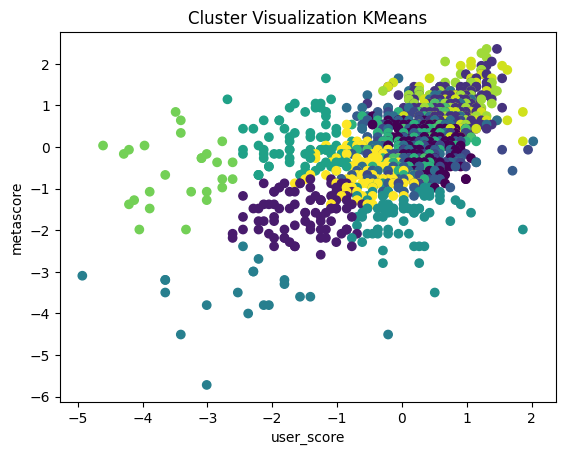

In [77]:
# Create a scatter plot of the data points colored by cluster labels

import matplotlib.pyplot as plt

#KMEANS

plt.scatter(X['user_score'], X['metascore'], c=cluster_labels1)
plt.xlabel('user_score')
plt.ylabel('metascore')
plt.title('Cluster Visualization KMeans')
plt.show()


In [78]:
from sklearn.preprocessing import StandardScaler

# instance
scaler = StandardScaler()

scaled_data = scaler.fit_transform(num)

# Convert the scaled data back to a DataFrame
num_scaled_df = pd.DataFrame(scaled_data, columns=num.columns)
num_scaled_df

,metascore,user_score
0,2.359668,1.307067
1,2.359668,1.466970
2,2.258683,1.227115
3,2.157698,1.307067
4,2.056713,0.667454
...,...,...
1359,-3.800403,-3.010315
1360,-4.002373,-2.370703
1361,-4.507297,-3.410073
1362,-4.507297,-0.212012


In [79]:
# KMeans model fit and training

from sklearn.cluster import KMeans

# instance 
kmeans = KMeans(n_clusters=15, random_state=42) # we start with 15

# Fit 
kmeans.fit(X)

# Get labels for the data
cluster_labels1 = kmeans.labels_


/Users/Ana/Desktop/Ironhack/Week_9/Final_project/PROJECT-switch-games/final_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
clusterskmeans = kmeans.predict(X) # predictions 

pd.Series(clusters).value_counts().sort_index() 

0     199
1      91
2     155
3     103
4      97
5     103
6      20
7      79
8      77
9      87
10     52
11     26
12     83
13     82
14    110
Name: count, dtype: int64

In [81]:
data["clusters_kmeans"] = clusterskmeans
data

,name,release_date,metascore,user_score,genre,clusters_kmeans
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure,12
1,Super Mario Odyssey,"October 27, 2017",97,89,Action,2
2,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure,12
3,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure,12
4,Tetris Effect: Connected,"October 8, 2021",94,79,Puzzle,12
...,...,...,...,...,...,...
1359,Arc of Alchemist,"January 30, 2020",36,33,Role-Playing,6
1360,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,41,Role-Playing,6
1361,ARK: Survival Evolved,"November 30, 2018",29,28,Action Adventure,6
1362,Tiny Racer,"July 31, 2020",29,68,Racing,6


In [88]:
clustersdbscan = dbscan.fit_predict(X) # predictions 

pd.Series(clustersdbscan).value_counts().sort_index() 

-1    362
 0    485
 1    181
 2     95
 3    144
 4     54
 5     43
Name: count, dtype: int64

In [89]:
data["clusters_dbscans"] = clustersdbscan
data

,name,release_date,metascore,user_score,genre,clusters_kmeans,clusters_dbscans
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure,12,-1
1,Super Mario Odyssey,"October 27, 2017",97,89,Action,2,-1
2,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure,12,-1
3,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure,12,-1
4,Tetris Effect: Connected,"October 8, 2021",94,79,Puzzle,12,-1
...,...,...,...,...,...,...,...
1359,Arc of Alchemist,"January 30, 2020",36,33,Role-Playing,6,-1
1360,Fantasy Hero: Unsigned Legacy,"January 25, 2018",34,41,Role-Playing,6,-1
1361,ARK: Survival Evolved,"November 30, 2018",29,28,Action Adventure,6,-1
1362,Tiny Racer,"July 31, 2020",29,68,Racing,6,-1


In [87]:
clustersagg_clustering = agg_clustering.fit_predict(X) # predictions 

pd.Series(clustersagg_clustering).value_counts().sort_index() 

0     135
1     222
2     143
3     108
4      65
5      53
6      91
7      51
8      77
9      88
10    171
11     14
12     19
13     59
14     68
Name: count, dtype: int64

In [91]:
data["clusters_aggregate_clustering"] = clustersagg_clustering
data.head(40)

,name,release_date,metascore,user_score,genre,clusters_kmeans,clusters_dbscans,clusters_aggregate_clustering
0,The Legend of Zelda: Breath of the Wild,"March 3, 2017",97,87,Action Adventure,12,-1,14
1,Super Mario Odyssey,"October 27, 2017",97,89,Action,2,-1,1
2,The House in Fata Morgana - Dreams of the Reve...,"April 9, 2021",96,86,Adventure,12,-1,3
3,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023",95,87,Action Adventure,12,-1,14
4,Tetris Effect: Connected,"October 8, 2021",94,79,Puzzle,12,-1,0
5,Metroid Prime Remastered,"February 8, 2023",94,88,Action,2,0,1
6,Persona 5 Royal,"October 21, 2022",94,84,Role-Playing,13,-1,2
7,Hades,"September 17, 2020",93,90,Role-Playing,13,-1,2
8,Divinity: Original Sin II - Definitive Edition,"September 4, 2019",93,84,Role-Playing,13,1,2
9,Ori and the Will of the Wisps,"September 17, 2020",93,87,Action,2,0,1


## Which Model to choose?
After carefully checking the different clustering methods (KMeans, DBSCAN and Aggregate Clustering), it appears that **Aggregate Clustering works best** for this case, so we will go ahead and use that one.

In [92]:
#saving our model data

filename1 = "../models/aggcluster.pickle" 

with open(filename1, "wb") as file: # we use a context manager to save the scaler: w: write, b: binary mode 
        pickle.dump(agg_clustering,file)

In [103]:
games = data.copy()
games.drop(['clusters_kmeans', 'clusters_dbscans'], axis=1, inplace = True)
games.head()

# Now we save the clustered data to csv
data.to_csv('../data/clean/nintendo_switch_games_clean_clusters.csv', index=False)

In [ ]:
"""

c = row["cluster"]
games[games["cluster"] == c].sample(23)

"""